---
author: Rishabh Mondal
title: Introduction to Univariate sampling 
date: '2023-02-07'
---

This blog is your gateway to delve into various commonly used univariate sampling. Here, you will find intriguing insights into the stories behind these distributions. For example, you will discover that the outcome of a coin flip follows a Bernoulli distribution. We provide comprehensive information about each distribution, including their probability mass or probability density functions, moments, and 
more. Additionally, we offer implementations of these distributions using PyTorch, allowing you to explore and 
experiment with different flavors and variations of each distribution.

# Some imports

In [55]:
#Important libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.distributions as dist
import math
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## A function to make the Matplotlib plots prettier


In [56]:
SPINE_COLOR = 'red'

def format_axes(ax):
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

### Pre-defined values

In [57]:

n_samples=10000
seed=42
p=0.4


## Random variables 

If the value of X is unknown and/or could change, we call it a ***random*** variable or ***rv***. The set of possible values, denoted X, is known as the ***sample space***.

***Discrete rv*** : If the sample space X is finite or countably infinite, then X is called a discrete random variable.

***Continuous rv***: If $X \in \mathbb{R}$ is a real-valued quantity, it is called a continuous random variable.

***Probability mass function or pmf*** : Function which computes the probability of events which setting the rv to each possible value: $p(x) = \Pr(X = x)$.

The PMF satisfies the properties $0 \leq p(x) \leq 1$ and $\sum_{x \in X} p(x) = 1$.



### Uniform distribution 

***Story*** : A continuous random variable X is said to have a Uniform distribution over the interval [a,b] , shown as X∼Uniform(a,b).

***Example*** :
Anything in which all possibilities are equally likely.

***Support*** :
The Uniform distribution is supported on the interval $[\alpha,\beta]$.

***PDF*** :
$$
f(x) = \begin{cases} 
\frac{1}{b - a} & \text{for } a \leq x \leq b \\
0 & \text{otherwise}
\end{cases}
$$

We can also plot and visualise the same phenomenon using a histogram shown below.

<Axes: >

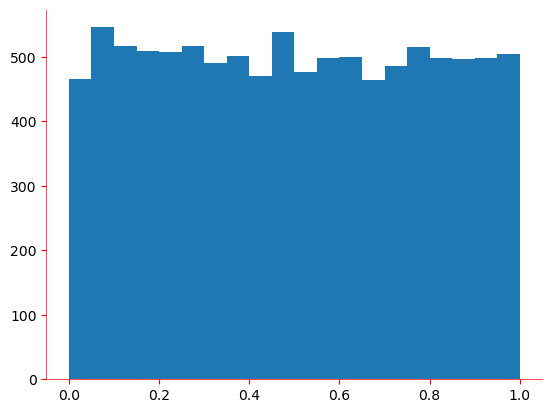

In [58]:
distribution = torch.distributions.Uniform(0, 1)
random_numbers = distribution.sample((n_samples,))
plt.hist(random_numbers.numpy(), bins=20)
format_axes(plt.gca())


We can notice that all outcomes within a given range are equally likely , ploted as a rectangular graph. 


### Bernoulli distribution 

***Story*** : Bernoulli Distribution is a discrete probability distribution used for experiments with yes/no outcomes. It represents a single trial with two possible outcomes: success (1) with probability p or failure (0) with probability $(1 - p)$. 

***pmf***:
$$
f(x, p) = \begin{cases}
p & \text{if } x = 1 \\
1 - p & \text{if } x = 0 \\
\end{cases}
$$
***Example*** : Flipping a coin. 

4024


<Axes: >

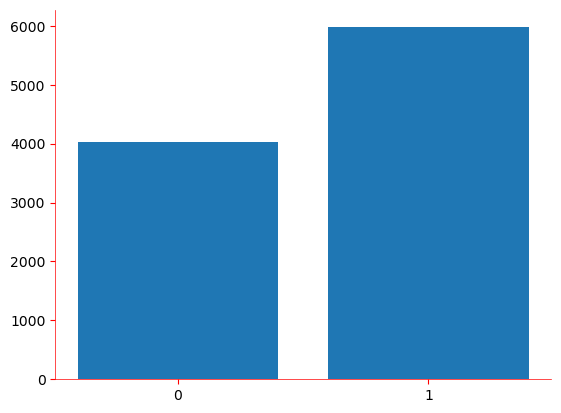

In [59]:
from torch.distributions import Bernoulli
p=torch.tensor(0.4)
bernoulli=Bernoulli(probs=p)
bernoulli_samples = bernoulli.sample((n_samples,))
x=[0,1]
f=[]
s=[]
for i in bernoulli_samples:
    if i == 1:
        s.append(i)
    else:
        f.append(i)   
print(len(s))   

plt.bar([0,1],[len(s),len(f)])
#plt.(bernoulli_samples.numpy(), bins=3)
plt.xticks([0,1], ['0', '1'])
format_axes(plt.gca())

### Categorical distribution 

***Story*** - In a set of discrete outcomes, each outcome is assigned a probability.

***Example*** - The student has a $p_{a}$ probability of studying, a $p_{b}$ probability of going out with friends, and a $p_{c}$ probability of watching a movie.

***pmf*** :
$$
f(x; p_1, p_2, ..., p_k) = 
\begin{cases}
p_1 & \text{if } x = 1 \\
p_2 & \text{if } x = 2 \\
\vdots \\
p_k & \text{if } x = k \\
\end{cases}
$$

 

tensor([2, 1, 1,  ..., 0, 1, 1])


Text(0.5, 0, 'categories')

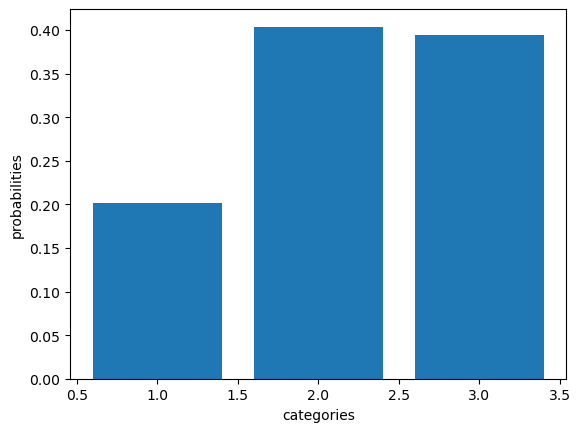

In [117]:
import torch.distributions as dist
from torch.distributions import Categorical
probs=torch.tensor([0.20,0.40,0.40])
categorical_distribution = Categorical(probs)
categorical_numbers = categorical_distribution.sample((n_samples,))
print(categorical_numbers)
category_counts = torch.bincount(categorical_numbers)
probabilities = category_counts / n_samples
#print(category_counts)
#print(probabilities)
categories = torch.arange(1,len(probabilities)+1)
#print(categories)
plt.bar(categories, probabilities)
plt.ylabel("probabilities")
plt.xlabel("categories")



***Support*** -
If we index the categories with sequential integers from 1 to N, the distribution is supported for integers 1 to N, inclusive when described using the indices of the categories.

tensor([0.2000, 0.6000, 1.0000])
4


Text(0.5, 0, 'categories')

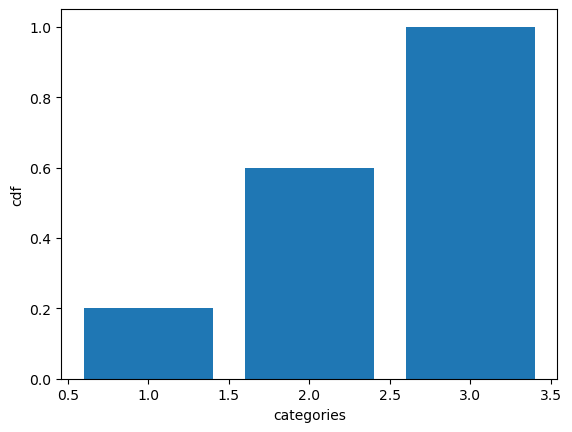

In [112]:
cdf = torch.cumsum((probs),dim=0)
print(cdf)
print(1+len(probabilities))
categories = torch.arange(1,len(probabilities)+1)
plt.bar(categories,cdf)
#plt.plot(categories,cdf)
plt.ylabel("cdf")
plt.xlabel("categories")

Categorical(probs: torch.Size([3]))
1


Text(0, 0.5, 'Probability')

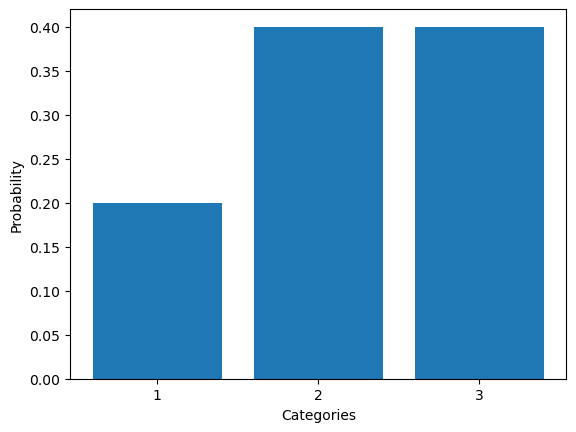

In [158]:
#Inverse cdf
categories=['1','2','3']
categorical_dist = dist.Categorical(probs)
print(categorical_dist)
sample=categorical_dist.sample()
print(sample.item()) # for value
plt.bar(categories, probs)
plt.xlabel('Categories')
plt.ylabel('Probability')


### Normal distribution 

***Story*** - The normal distribution arises when many small factors contribute to a quantity without any extreme variations, resulting in a bell-shaped curve.

***Example*** - When measuring the heights of a large population, we typically find that the distribution follows a bell-shaped curve, with the majority of individuals clustering around the average height and fewer individuals at the extremes (very tall or very short)

$$
f(x;\mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

***Moments***

Mean: $\mu$ , 
Variance: $\sigma$

Text(0.5, 0, 'x')

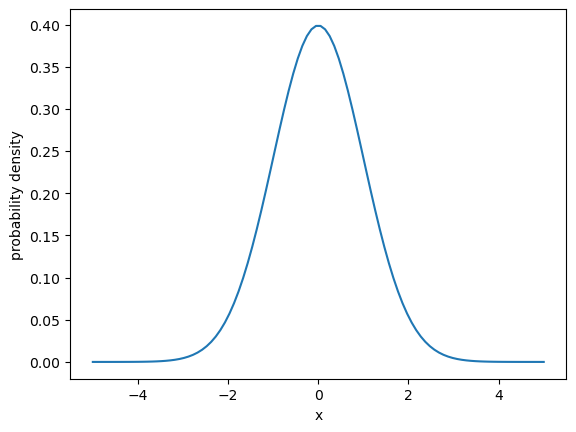

In [163]:
from torch.distributions import Normal
mean = torch.tensor([0.0])
stddev = torch.tensor([1.0])
dist = Normal(mean, stddev)
x = np.linspace(-5, 5, 100)
pdf = torch.exp(dist.log_prob(torch.tensor(x))).numpy()

# Plot the normal distribution
plt.plot(x, pdf)
plt.ylabel("probability density")
plt.xlabel("x")


In [174]:
## cdf
from math import *
def phi(x, mu, sigma): 
    return (1 + erf((x - mu) / sigma / sqrt(2))) / 2
x = np.linspace(-5, 5, 100)
print(x)
phi(x,0,1)

[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.18181818  3

TypeError: only size-1 arrays can be converted to Python scalars

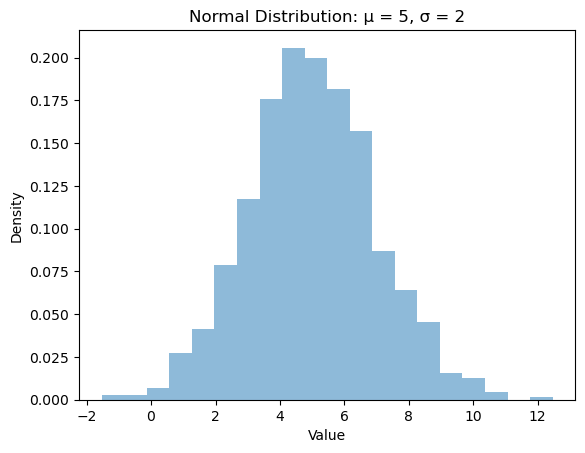

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Set the mean and standard deviation of the original normal distribution
mu = 0
sigma = 1

# Set the desired mean and standard deviation of the converted normal distribution
a = 5
b = 2

# Generate random samples from the standard normal distribution
x = np.random.normal(mu, sigma, 1000)

# Apply the transformation to convert to the desired normal distribution
y = a + b * x

# Plot the histogram of the converted normal distribution
plt.hist(y, bins=20, density=True, alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title(f'Normal Distribution: μ = {a}, σ = {b}')
plt.show()


### Beta distribution

***Story*** : Let's say you have two processes, each consisting of multiple steps. Both processes occur at the same rate, but the first process requires $\alpha$ step and the second process $\beta$ ,the fraction of the total waiting time taken by the first process is Beta distributed .

***Example*** : Include the Click-Through Rate (CTR) of an advertisement, the conversion rate of customers purchasing on your website.

$$f(x; \alpha, \beta) = \frac{x^{\alpha-1} (1-x)^{\beta-1}}{B(\alpha, \beta)}$$

where 

$$B(\alpha, \beta) = \int_0^1 x^{\alpha-1} (1-x)^{\beta-1} dx$$

***Support*** : The Beta distribution has support on the interval [0, 1].

***Moments*** :

$\mu = \frac{\alpha}{\alpha + \beta}$

$\sigma^2 = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$



<Axes: >

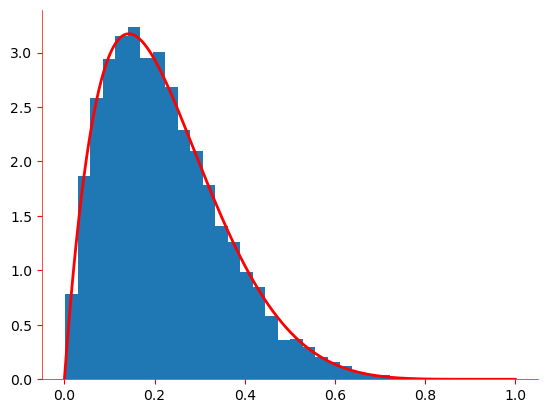

In [63]:
alpha = 2
beta = 7
# Create a Beta distribution object
beta_dist = torch.distributions.Beta(alpha, beta)
samples = beta_dist.sample((n_samples,))
samples_np = samples.numpy()
plt.hist(samples_np, bins=30, density=True)

# Plot the probability density function (PDF)
x = torch.linspace(0, 1, n_samples)
pdf = beta_dist.log_prob(x).exp()
plt.plot(x.numpy(), pdf.numpy(), 'r-', linewidth=2)
format_axes(plt.gca())

### Gamma distrubution


<Axes: >

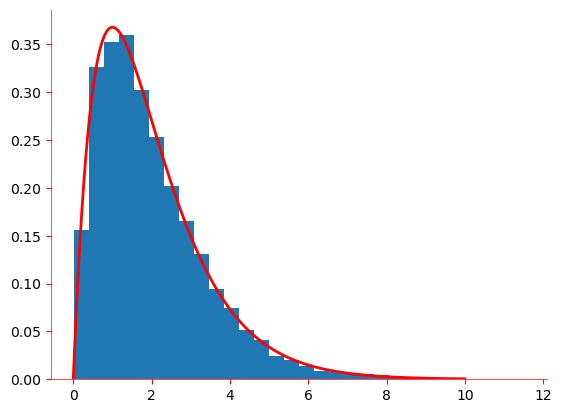

In [64]:
alpha = 2.0
beta = 1.0
# Create a Gamma distribution object
gamma_dist = torch.distributions.Gamma(alpha, beta)
samples = gamma_dist.sample((n_samples,))
samples_np = samples.numpy()
plt.hist(samples_np, bins=30, density=True)

# Plot the probability density function (PDF)
x = torch.linspace(0, 10, n_samples)
pdf = gamma_dist.log_prob(x).exp()
plt.plot(x.numpy(), pdf.numpy(), 'r-', linewidth=2)
format_axes(plt.gca())

### Cumulative Distribution Function (CDF)

***Story*** : The Cumulative Distribution Function or the CDF is the probability that a real-valued random variable X
with a given probability distribution is less than or equal to a quantity x
. It is often denoted by $F(x)=P(X≤x)$

***Properties*** : 

1.The CDF is a non-decreasing function.

2.$\lim_{{x \to \infty}} F(x) = 1$
 (An upper bound and horizontal asymptote at $F(x)=1$
 if x
 approaches $∞$
.)

3.$\lim_{{x \to \infty}} F(x) = 0$
 (A lower bound and horizontal asymptote at $F(x)=0$
 if x
 approaches $-∞$.)

$F(x) = \begin{cases}
\frac{x - a}{b - a} & \text{for } a \leq x \leq b \\
\end{cases}
$

### The Inverse CDF Method For Generating Non-Uniform Random Numbers

***Story*** : We have discovered that the standard uniform random variable takes on values between 0 and 1 inclusive. The CDF of a (continuous) distribution also takes on values between 0 and 1 inclusive. In addition, the inverse CDF $F^{-1}(x)$
 is also an increasing function (of $x$
).

***algorithm*** : Obtain or generate a draw $u$ from the standard uniform distribution $U \sim \text{Unif}(0,1)$.

The draw $x$ from the CDF $F(x)$ is given by $x = F^{-1}(u)$.

***Example*** : Suppose we only know how to generate or sample $Unif(0,1)$ random variables. We want to generate $Unif(a,b)$ random variables. The Inverse CDF Method follows -


The CDF of $Unif(a,b)$ is $F(x)= U =\frac{x - a}{b - a}$ for any $x$ in the open interval $(a,b)$.
 
 
The resulting inverse CDF : $F^{-1}(u) = a + (b - a)u$



<Axes: >

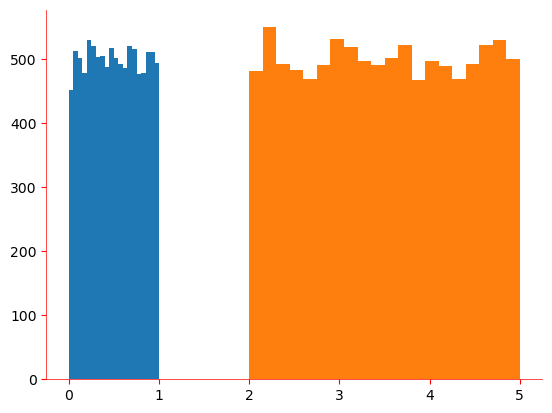

In [65]:
# range of distribution
a = 2
b = 5

# uniform distribution
distribution = torch.distributions.Uniform(0, 1)
random_numbers = distribution.sample((n_samples,))
plt.hist(random_numbers.numpy(), bins=20)
format_axes(plt.gca())
uniform_dist = torch.distributions.Uniform(a, b)

# Generate random samples from the uniform distribution
samples = uniform_dist.sample((n_samples,))
plt.hist(samples.numpy(), bins=20)


format_axes(plt.gca())

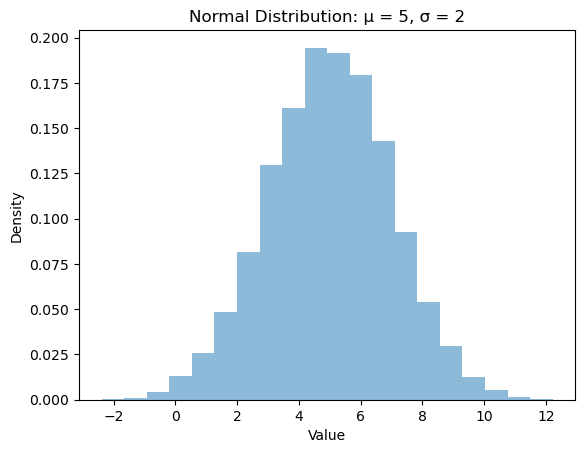

In [66]:
mu = 0
sigma = 1

# Set the desired mean and standard deviation of the converted normal distribution
a = 5
b = 2

# Create a normal distribution with the original mean and standard deviation
original_dist = torch.distributions.Normal(mu, sigma)

# Generate random samples from the original normal distribution
samples = original_dist.sample((10000,))

# Apply the transformation to convert to the desired normal distribution
converted_samples = a + b * samples

# Create a normal distribution with the desired mean and standard deviation
converted_dist = torch.distributions.Normal(a, b)

# Plot the histogram of the converted normal distribution
plt.hist(converted_samples.numpy(), bins=20, density=True, alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title(f'Normal Distribution: μ = {a}, σ = {b}')
plt.show()


### Implementing a pseudo-random number generator (PRNG)

**Implementing a pseudo-random number generator (PRNG)** - Generates a sequence of numbers that exhibit properties of randomness

**Linear Congruential Generator (LCG)** is a simple PRNG algorithm - The LCG algorithm is defined by the recurrence relation:

$X_{n+1} = (a \cdot X_n + c) \mod m$

- $X_{n+1}$ is the Next pseudo-random number.
- $X_n$ is the current pseudo-random number.
- $a$ is the multiplier , determines the period of the generated number.
- $c$ is the increment, shifts the generated sequence.
- $m$ is the modulus, determines the range of values .


***Integer Constant***

$m,{0<m}$ — The modulus

$a,0<a<m$ — The multiplier

$c,0<=c<m$ — The increment

$X_{0},0<X_{0}<m$ — The seed / start value



In [67]:
# Function for Linear Congruential Generator
def lcg(seed, n_samples):
    """
    Generates a sequence of pseudo-random numbers using the Linear Congruential Generator (LCG) algorithm.

    Args:
        seed (int): The seed value for the LCG algorithm.
        n_samples (int): The number of random numbers to generate.

    Returns:
        list: A list of pseudo-random numbers normalized to the range [0, 1].
    """
    a = 1103515245
    c = 12345
    m = 2 ** 31
    random_numbers = []

    for _ in range(n_samples):
        seed = (a * seed + c) % m
        random_number = seed / m  # Normalize to range [0, 1]
        random_numbers.append(random_number)

    return random_numbers


Plot histogram

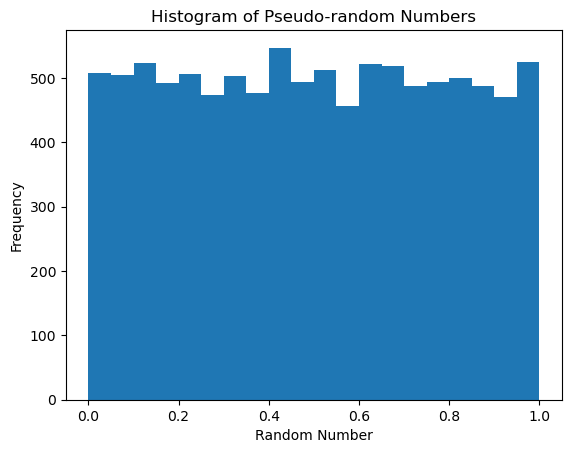

In [68]:

# Example usage:
random_numbers = lcg(seed, n_samples )

plt.hist(random_numbers, bins=20)
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.title('Histogram of Pseudo-random Numbers')
plt.show()

### Uniform to Normal sampling

***Box Muller Method***

In [69]:
def uniform_to_normal_boxmuller(n_samples):
    """
    Generates a sequence of pseudo-random numbers from a standard normal distribution using the Box-Muller method.

    Args:
        n_samples (int): The number of random numbers to generate.

    Returns:
        torch.Tensor: A tensor of pseudo-random numbers following the standard normal distribution.
    """
    uniform_distribution = dist.Uniform(0, 1)
    random_numbers = []

    for _ in range(n_samples // 2):
        u1 = uniform_distribution.sample()
        u2 = uniform_distribution.sample()

        z1 = torch.sqrt(-2 * torch.log(u1)) * torch.cos(2 * math.pi * u2)
        z2 = torch.sqrt(-2 * torch.log(u1)) * torch.sin(2 * math.pi * u2)

        random_numbers.append(z1)
        random_numbers.append(z2)

    if n_samples % 2 != 0:
        u = uniform_distribution.sample()
        z = torch.sqrt(-2 * torch.log(u)) * torch.cos(2 * math.pi * uniform_distribution.sample())
        random_numbers.append(z)

    return torch.stack(random_numbers)

In ***Normal Distribution*** Values are ***symmetrically distributed*** around a central mean. For example, heights in a population follow a ***bell-shaped*** curve, with the most common values near the mean and fewer occurrences as we move away from it. Graphically, it is represented by a bell-shaped curve.